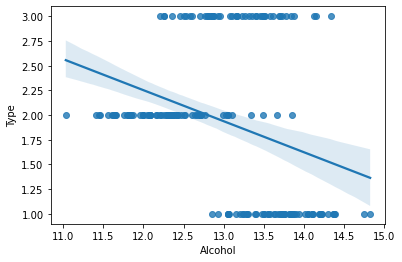

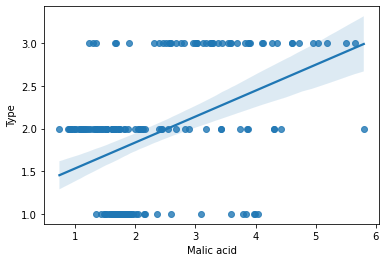

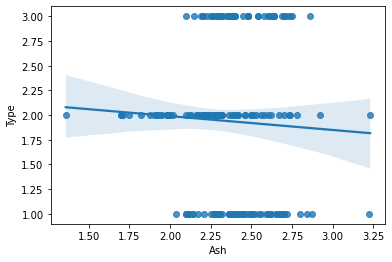

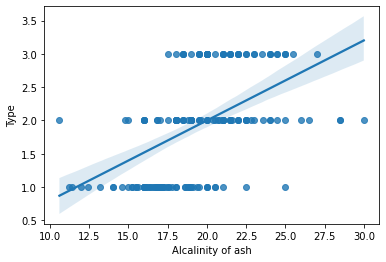

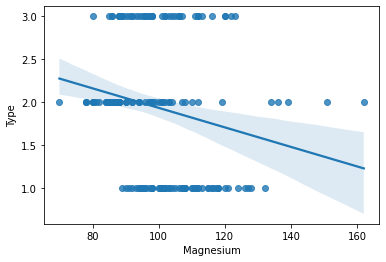

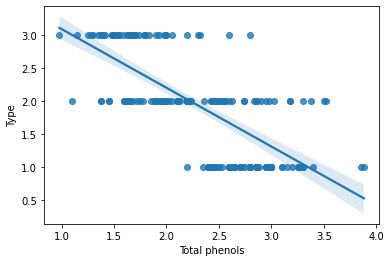

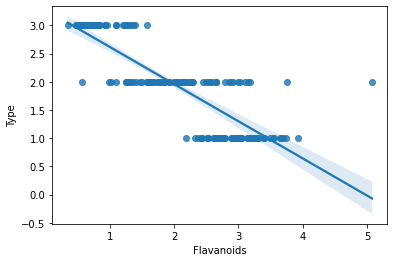

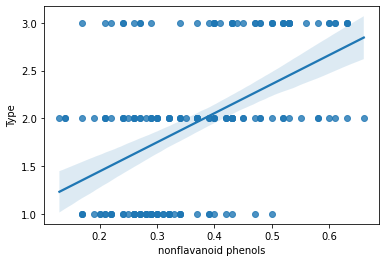

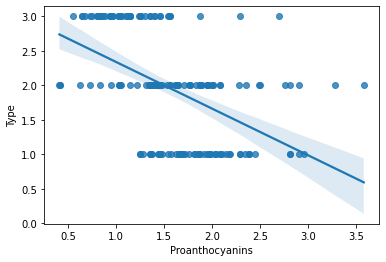

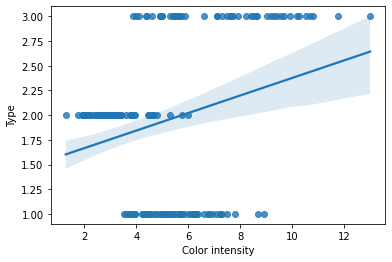

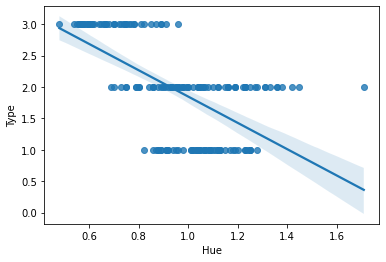

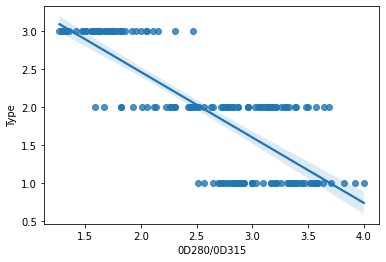

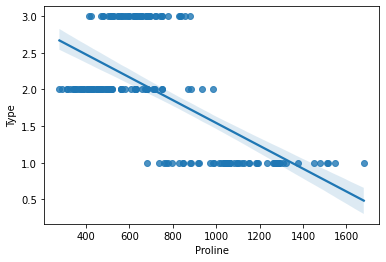

     Atual  Previsto:
10       1          1
134      3          3
28       1          1
121      2          2
62       2          2
51       1          1
7        1          1
66       2          2
129      2          2
166      3          3
102      2          2
143      3          3
42       1          1
130      3          3
14       1          1
108      2          2
105      2          2
20       1          1
100      2          2
38       1          1
93       2          2
60       2          2
22       1          1
18       1          1
98       2          2
64       2          2
58       1          1
132      3          3
112      2          2
155      3          3
48       1          1
176      3          3
94       2          2
177      3          3
164      3          3
173      3          3
1.0
0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

dataset_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

column = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', '0D280/0D315', 'Proline']
data = pd.read_csv(dataset_url, sep = ',', names = column)

Y = data.Type
X = data.drop('Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

#pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(random_state = 42))
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(random_state = 42))

#configurações da árvore
#hyperparameters = {'randomforestregressor__max_depth': [None, 5, 3, 1]}
hyperparameters = {'randomforestclassifier__max_depth': [None, 5, 3, 1]}

#validação cruzada
clf = GridSearchCV(pipeline,hyperparameters,cv=10)
clf.fit(X_train, y_train)

names = column
names.remove('Type')

#for var in names:
#  plt.figure()
#  sns.regplot(x=var, y='Type', data = data)
#plt.show()

joblib.dump(clf, 'rf_regressor.pkl')

#erro
pred = clf.predict(X_test)
df_preds = pd.DataFrame({'Atual':y_test.squeeze(), 'Previsto:': pred.squeeze()})
print(df_preds)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))